In [27]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [18]:
def my_scaler(x):
    """standardize the predictors"""
    
    new_x = pd.DataFrame(scale(x, axis=0, with_mean=True, with_std=True, copy=True))
    new_x.columns = x.columns
    
    return new_x

def my_normal(x):
    """normalize the predictors"""
    
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(x)
    new_x = pd.DataFrame(scaled_values)
    new_x.columns = x.columns

    return new_x

def plot_cluster_result(df, cluster_colname):
    """ploting all cluster in a single guitar tab plot"""    
    
    sns.set(style="whitegrid")

    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

#     # Show each observation with a scatterplot
#     sns.stripplot(x="value", y="measurement", hue=cluster_colname,
#                   data=df, dodge=True, jitter=True,
#                   alpha=.25, zorder=1)
    
    # Show the conditional means
    sns.pointplot(x="value", y="measurement", hue=cluster_colname,
                  data=df, dodge=.532, join=True, palette="dark",
                  markers="d", scale=.75, ci=None)

    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], labels[0:], title=cluster_colname,
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=3, frameon=True)
    
def plot_single_cluster(df, cluster_colname, cluster_num, color="#3160D6"):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")

    # filter cluster data
    df = df[df[cluster_colname]==cluster_num].copy()
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show the conditional means
    sns.pointplot(x="value", y="measurement", 
                  data=df, dodge=.532, join=False, 
                  markers="d", scale=.75, ci=None, color=color)#palette="dark",
    
def plot_cluster_facet(df, cluster_colname):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Show the conditional means
    g = sns.factorplot(x="value", y="measurement",
                   col="cluster",
                    data=df, kind="point",
                    dodge=False,
                    size=4, aspect=.7);#hue="smoker", 

In [4]:
final_cluster_clean_id=pd.read_csv("final_cluster_clean_5_10.csv")
final_cluster_clean=final_cluster_clean_id.drop(["playersID","teamID"],axis=1)

In [9]:
player_feature_df=final_cluster_clean
min_max_scaler = preprocessing.MinMaxScaler()
player_feature_df = my_normal(player_feature_df)

### cluster player performance features¶ 

In [11]:
performance_cluster=player_feature_df[['Ability', 'Grenade', 'KDA', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score']]

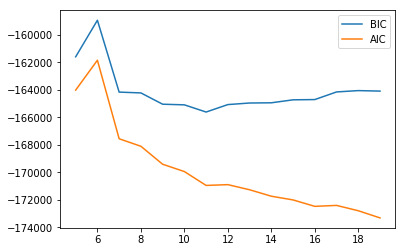

In [13]:
n_components = np.arange(5, 20)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(performance_cluster) for n in n_components]
bics = [clf_temp.bic(performance_cluster) for clf_temp in clfs]
aics = [clf_temp.aic(performance_cluster) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

In [44]:
#choose 7 clusters
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=7, covariance_type='full')
clf.fit(performance_cluster)
performance_cluster = performance_cluster.copy()
performance_cluster['performance_cluster'] = clf.predict(performance_cluster)
performance_cluster['performance_cluster'].value_counts()

0    763
1    751
2    652
5    627
4    450
3    390
6    102
Name: performance_cluster, dtype: int64

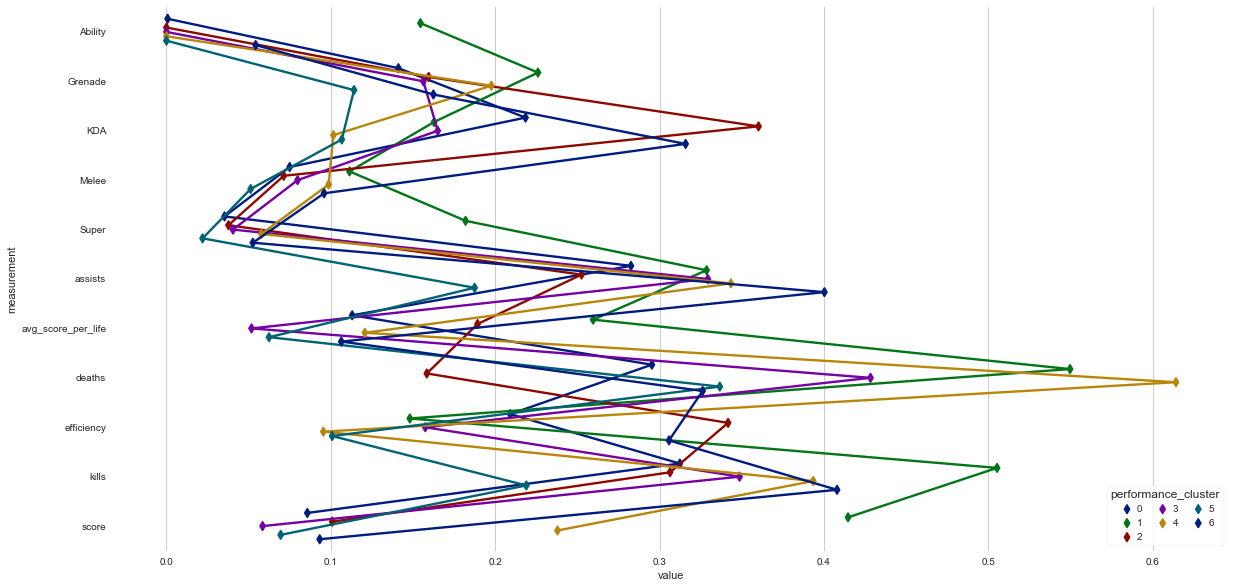

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(performance_cluster, 'performance_cluster')

In [29]:
# split df into cluster groups
grouped = performance_cluster.groupby(['performance_cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F','Persona G'],
                   x=['Ability', 'Grenade', 'KDA','Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score'
                     ],
                   colorscale='Viridis')]
init_notebook_mode(connected=True)
iplot(data)

### Cluster Weapon Percentage

In [38]:
pro_weapon_cluster=player_feature_df[['Pro Auto Rifle',
       'Pro Fusion Rifle', 'Pro Grenade Launcher', 'Pro Hand Cannon',
       'Pro Linear Fusion Rifle', 'Pro Pulse Rifle', 'Pro Rocket Launcher',
       'Pro Scout Rifle', 'Pro Shotgun', 'Pro Sidearm', 'Pro Sniper Rifle',
       'Pro Submachine Gun', 'Pro Sword', 'Pro Trace Rifle']]


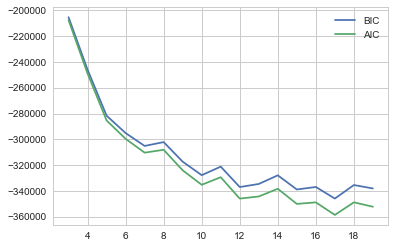

In [39]:
n_components = np.arange(3, 20)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(pro_weapon_cluster) for n in n_components]
bics = [clf_temp.bic(pro_weapon_cluster) for clf_temp in clfs]
aics = [clf_temp.aic(pro_weapon_cluster) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

In [43]:
#choose 7 clusters
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=7, covariance_type='full')
clf.fit(pro_weapon_cluster)
pro_weapon_cluster = pro_weapon_cluster.copy()
pro_weapon_cluster['weapon_pro_cluster'] = clf.predict(pro_weapon_cluster)
pro_weapon_cluster['weapon_pro_cluster'].value_counts()

3    971
0    938
4    605
1    528
5    278
2    230
6    185
Name: weapon_pro_cluster, dtype: int64

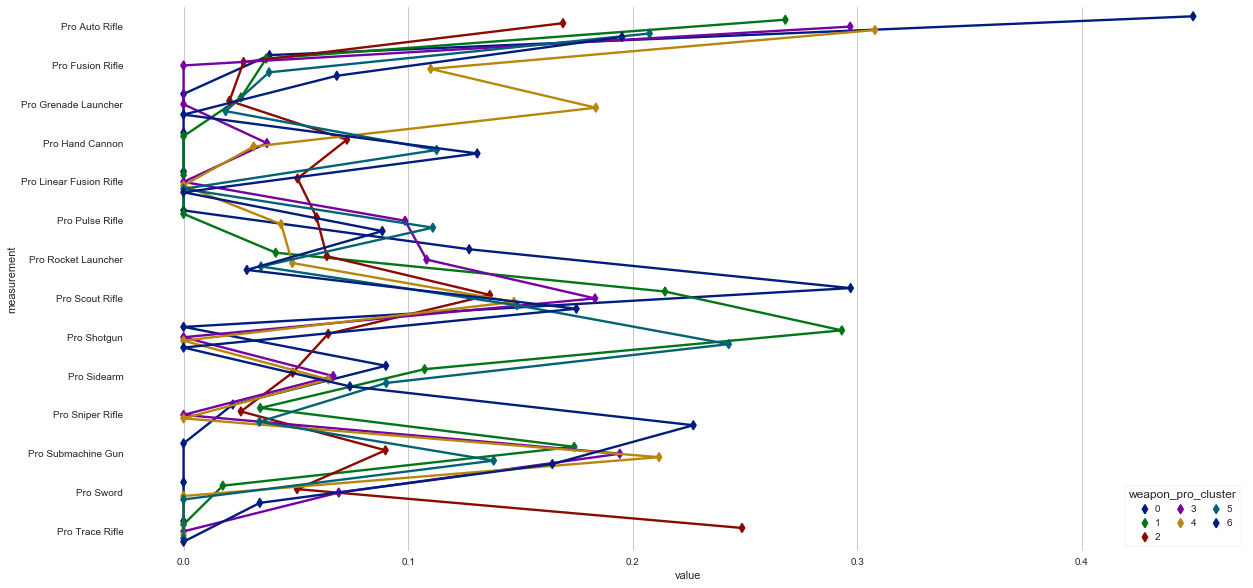

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(pro_weapon_cluster, 'weapon_pro_cluster')

In [47]:
# split df into cluster groups
grouped = pro_weapon_cluster.groupby(['weapon_pro_cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F','Persona G'],
                   x=['Pro Auto Rifle',
       'Pro Fusion Rifle', 'Pro Grenade Launcher', 'Pro Hand Cannon',
       'Pro Linear Fusion Rifle', 'Pro Pulse Rifle', 'Pro Rocket Launcher',
       'Pro Scout Rifle', 'Pro Shotgun', 'Pro Sidearm', 'Pro Sniper Rifle',
       'Pro Submachine Gun', 'Pro Sword', 'Pro Trace Rifle'
                     ],
                   colorscale='Viridis')]
init_notebook_mode(connected=True)
iplot(data)

### Label clusters back to dataset 

In [55]:
lable_data=player_feature_df.copy()
lable_data["performance_cluster"]=performance_cluster["performance_cluster"]
lable_data["weapon_pro_cluster"]=pro_weapon_cluster["weapon_pro_cluster"]

In [56]:
final_cluster_clean_id=pd.read_csv("final_cluster_clean_5_10.csv")

In [57]:
lable_data["playersID"]=final_cluster_clean_id["playersID"]
lable_data["teamID"]=final_cluster_clean_id["teamID"]

In [59]:
lable_data.to_csv("label_with_id_5_10.csv",index=False)